## 1. IMPORT LIBRARIES & FETCH DATA

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y_raw = heart_disease.data.targets 

print("Data fetched successfully.")

Data fetched successfully.


## 2. PREPROCESSING

In [2]:
# Replace missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Put the imputed data back into a DataFrame with the original column names
X = pd.DataFrame(X_imputed, columns=X.columns)
print("Missing values handled using median imputation.")

y = y_raw['num'].apply(lambda x: 1 if x > 0 else 0)
print("Target variable converted to 0 = no disease, 1 = has disease")

Missing values handled using median imputation.
Target variable converted to 0 = no disease, 1 = has disease


## 3. DATA SPLITTING & SCALING

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (242, 13)
Testing data shape: (61, 13)


## 4. Train & Evaluate

Accuracy: 0.8688524590163934
Recall: 0.84375
Precision: 0.9
F1-Score: 0.8709677419354839


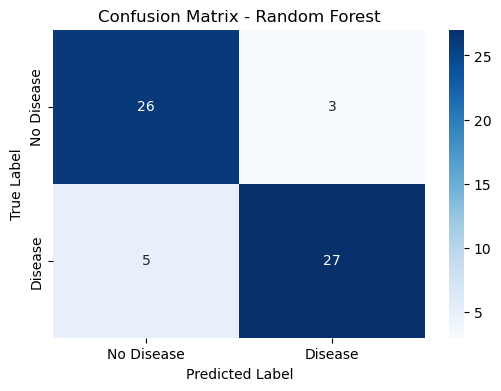

In [4]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy:",accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1-Score:",f1_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()